In [1]:
import numpy as np
import matplotlib.pyplot as plt

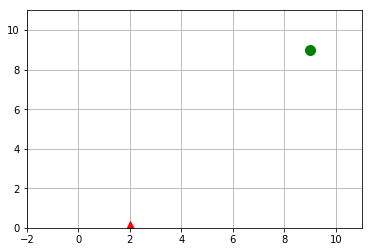

In [2]:
hx, hy = 9, 9  # hedef
x, y = 2, 0    # baslangic

yolx = [x]
yoly = [y]

def ciz():
    global x, y
    plt.plot(hx, hy, 'go', markersize=10)
    plt.plot(x, y, 'r^', markersize=15)
    plt.plot(yolx, yoly)
    plt.axis((-2,hx+2,0,hy+2))
    plt.grid()
    plt.show()

ciz()

In [3]:
def sag():
    global x, y
    x = x +1
    yolx.append(x)
    yoly.append(y)
    
def sol():
    global x, y
    x = x -1
    yolx.append(x)
    yoly.append(y)
    
def yukari():
    global x, y
    y = y + 1
    yolx.append(x)
    yoly.append(y)
    
def reset():
    global yolx, yoly, x, y
    x, y = 2, 0    # baslangic

    yolx = [x]
    yoly = [y] 

In [4]:
reset()

yukari()
sag()
yukari()
sag()
yukari()
sag()
yukari()
sol()
print(yolx)
print(yoly)

[2, 2, 3, 3, 4, 4, 5, 5, 4]
[0, 1, 1, 2, 2, 3, 3, 4, 4]


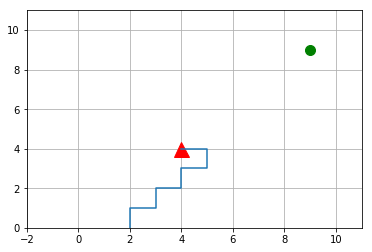

In [5]:
ciz()

In [7]:
hareket = {"YUK":yukari, "SAG":sag, "SOL":sol}
cozum = np.random.choice(["YUK","SAG","SOL"], 8)
m = np.random.choice(len(cozum))
cozum[m] = np.random.choice(["YUK","SAG","SOL"])
cozum

array(['YUK', 'SOL', 'YUK', 'YUK', 'SOL', 'SOL', 'SOL', 'SOL'],
      dtype='<U3')

In [8]:
cozum1 = np.random.choice(["YUK","SAG","SOL"], 8)
cozum2 = np.random.choice(["YUK","SAG","SOL"], 8)
print(cozum1)
print(cozum2)

['YUK' 'YUK' 'YUK' 'SOL' 'YUK' 'SOL' 'SOL' 'YUK']
['SOL' 'YUK' 'SAG' 'SAG' 'SAG' 'SAG' 'YUK' 'YUK']


[2, 2, 1, 1, 1, 0, -1, -2, -3]
[0, 1, 1, 2, 3, 3, 3, 3, 3]


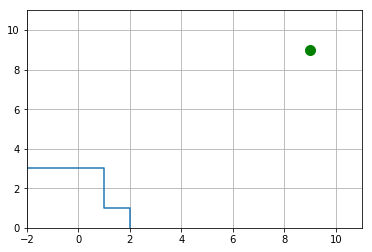

In [11]:
reset()
for c in cozum:
    hareket[c]()
print(yolx)
print(yoly)
ciz()


In [28]:
def cozumciz(cozum):
    reset()
    for c in cozum:
        hareket[c]()
    print(yolx)
    print(yoly)
    ciz()  
    
def uyum2(birey):
    return 1/ (1 + sum((adam - birey)**2))

def kisi3(n = 8):
    """ n uzunlugunda OYA harflerinden olusan genotip
        ornek: kisi3() >> ['SAG', 'YUK', 'SOL', 'YUK', 'YUK', 'SAG', 'YUK', 'SOL']
    """
    return np.random.choice(["YUK","SAG","SOL"], n)

def uyum3(cozum):
    """ probleme gore uyum degisir. 
    Burada maksimizasyon probleminde, ne kadar cok bire sahipseniz o kadar uyumlusunuz."""
    reset()
    for c in cozum:
        hareket[c]()
    
    fark_kare = (yolx[-1] - hx)**2 + (yoly[-1] - hy)**2 
    return 1/(1+fark_kare**(0.5))

def mutasyon3(kisi, p):
    """ p olasilikla kisinin bir ozelligine OYA harflerinden rastgele
    biri atanir."""
    if np.random.rand() < p:
        m = np.random.choice(len(kisi))
        kisi[m] = np.random.choice(["YUK","SAG","SOL"])
        
def olasilik(toplum, uyum = uyum2, elitist = True):
    """her bireyin uyum degeri hesaplanip, olasilik degerine dondurulur.
    (uyumlar) [0.2, 0.2, 0.4, 0.4, 0.8] >> (olasiliklar) [0.1, 0.1, 0.2, 0.2, 0.4]
    
    if elitist == True
        [0.2, 0.2, 0.4, 0.4, 0.8] >>[ 0.10225857,  0.10225857,  0.16859588,  0.16859588,  0.45829111]
    """
    uyumlar = np.array([uyum(toplum[i])  for i in range(len(toplum))])
    if elitist:
        uyumlar = np.exp(uyumlar / uyumlar.mean()) # ortalamadan kucuk degerler iyice kuculur
    olasiliklar = uyumlar / uyumlar.sum()
    return olasiliklar

def en_iyi(toplum, olasiliklar):
    eniyi = olasiliklar.argsort()[-1]
    return toplum[eniyi]

def caprazlama(toplum, secim):
    """Basarili 2 birey kisi0 ve kisi1 secilip caprazlanir."""
    kisi0 = toplum[secim[0]]
    kisi1 = toplum[secim[1]]
    n = len(toplum[secim[0]])//2
    return np.hstack((kisi0[:n],kisi1[n:]))

def yeni_toplum(toplum, olasiliklar, mutasyon = mutasyon3, p = 0.05):
    """ Toplumun (basarisiz) yarisi emekli edilip,
    basarili bireylerin cocuklari topluma eklenecek.
    """
    k = len(toplum)//2
    emekli = olasiliklar.argsort()[:k] # basarisizlar
    #yeniler = np.zeros((k,toplum.shape[1]))
    for i in range(k):
        s = secim(olasiliklar)
        yeni_kisi = caprazlama(toplum, s)
        mutasyon(yeni_kisi, p) 
        #yeniler[i] = yeni_kisi
        toplum[emekli[i]]= yeni_kisi
        
    #toplum[emekli] = yeniler
    return toplum
    
def secim(olasiliklar):
    """p=olasiliklara gore bireyler secilir. Olasiligi yuksek olan daha fazla secilir."""
    secim = np.random.choice(len(olasiliklar), 2, replace= False, p=olasiliklar)
    return secim

In [25]:
N = 10 # Toplumdaki kisi sayisi N
toplum = np.array([kisi3(n = 16)  for i in range(N)])
olasiliklar = olasilik(toplum, uyum=uyum3)

eniyi = en_iyi(toplum, olasiliklar)
eniyi

array(['YUK', 'YUK', 'SOL', 'YUK', 'YUK', 'SAG', 'YUK', 'SOL', 'YUK',
       'YUK', 'YUK', 'SAG', 'YUK', 'SAG', 'SAG', 'SAG'], dtype='<U3')

[2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 3, 4, 5]
[0, 1, 2, 2, 3, 4, 4, 5, 5, 6, 7, 8, 8, 9, 9, 9, 9]


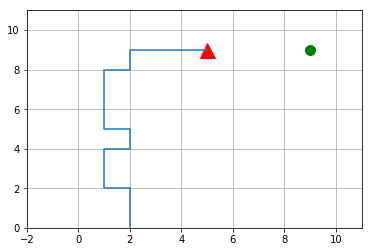

In [26]:
cozumciz(eniyi)

[2, 3, 3, 3, 3, 3, 3, 4, 5, 5, 5, 5, 6, 6, 7, 8, 9]
[0, 0, 1, 2, 3, 4, 5, 5, 5, 6, 7, 8, 8, 9, 9, 9, 9]


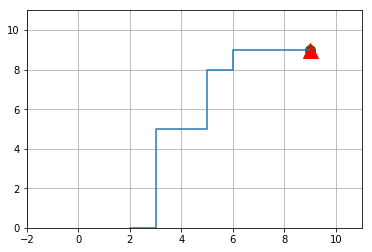

In [29]:
for i in range(100):
    toplum = yeni_toplum(toplum, olasiliklar, mutasyon = mutasyon3, p= 0.15) 
    olasiliklar = olasilik(toplum, uyum=uyum3)
cozumciz(en_iyi(toplum, olasiliklar))